## Visualize relationship of most important features to target (lateness)
regression models chose some features which were most correlated with lateness.
hypothesis is that there are several different use cases with different root causes which lead to lateness.

Seeing is believing. 
_https://www.merriam-webster.com/dictionary/seeing%20is%20believing
Seeing is believing definition is - —used to say that when something unlikely is witnessed, the truth of its occurrence or existence can no longer be doubted._

Use data visualization to visually verify if the features identified as most important are significant use cases. If so these specific use cases can be targeted for improvement by changes to business processes and policies. Or if prediction of lateness is still important we might have more success building models for each of those cases separately instead of one predictive model for the variety of use cases which lead to lateness.

Investigated root causes of lateness to pickup. 2 main cases stand out: 
- Specific drivers are a main cause. The most frequently late 20% of drivers were >=5 minutes late more than 8% of the time on 2017 data. Find leading indicators of late driver behavior to help manage the driver pool.
- Trips with last-minute claims. Address last-minute chaos: CD cancels, back-to-back trip conflicts, late ETA driver replacements. 
Minor case but observable in the data:
- 7-8am pickups have slightly elevated lateness compared to other hours of the day.

Hypotheses requiring data outside this dataset:
- Departing for a trip late is a likely cause of arriving late. Estimating planned departure time and location would help us dig deeper. Quantify missing GPS coordinates at departure time when driver app may be backgrounded.

Semantic clustering of the top 10 most important features (after IDs have been removed)

- driver previous behavior, training
- 1. 'avg_prior_arrived_late_seconds'
- last-minute driver replacements
- 2. 'claimed_before_trip_start_secs'
- driver experience, driver onboarding process, training
- 3. 'driver_previous_completed_trips'
- 9. 'driver_signup_before_trip_start_secs'
- 10. 'driver_created_at_pdt_dayofyear'
- geography, possibly traffic related
- 4. 'avg_prior_arrived_late_seconds_to_origin_location'
- 5. 'driver_home_lat'
- 6. 'driver_home_lon'
- 7. 'origin_lon'
- first trip in the morning, reminders
- 8. 'scheduled_starts_at_pdt_hour'


In [1]:
fileprefix='./lateness_PREP_V12_'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_X=pd.read_csv(fileprefix+'X.csv', sep='\t')

In [4]:
df_X.shape

(125675, 217)

In [5]:
df_y=pd.read_csv(fileprefix+'y.csv', sep='\t', header=None)

In [6]:
type(df_y)
df_y.shape

(125675, 2)

In [7]:
df_y.head()

,0,1
0,5,-497.0
1,6,5.0
2,7,-313.0
3,8,-296.0
4,9,-166.0


In [8]:
y=df_y[1]
y.head()

0   -497.0
1      5.0
2   -313.0
3   -296.0
4   -166.0
Name: 1, dtype: float64

In [9]:
y.shape

(125675,)

In [10]:
df_X.head()

,Unnamed: 0,claimed_at_pdt_hour_22,claimed_at_pdt_hour_1,scheduled_starts_at_pdt_hour_11,origin_analysis_metro_name_OC,scheduled_starts_at_pdt_quarter,created_at_pdt_weekofyear,origin_region_id,claimed_at_pdt_month_4,origin_region_name_San Fernando Valley - East,...,total_predicted_duration,scheduled_starts_at_pdt_hour_9,claimed_at_pdt_quarter_4,origin_location_id,claimed_at_pdt_hour_3,drivers_prev_ride_1hr_int,driver_home_lon,scheduled_starts_at_pdt_hour,origin_lon,driver_signup_before_org_signup_secs
0,5,0,0,0,0,1,5,44.0,0,1,...,36.47,0,0,82879.0,0,1,-118.25,16,-118.35,-69412.0
1,6,0,0,0,0,1,2,33.0,0,0,...,29.00,0,0,83958.0,0,1,-118.25,16,-118.31,-69815.0
2,7,0,0,0,0,1,5,48.0,0,0,...,18.90,0,0,84580.0,0,1,-118.25,16,-118.16,-66508.0
3,8,0,0,0,0,1,4,36.0,0,0,...,22.93,0,0,87880.0,0,1,-118.25,16,-118.24,-69324.0
4,9,0,0,0,0,1,40,45.0,0,0,...,35.50,0,0,92149.0,0,0,-118.25,14,-118.51,-70895.0


In [11]:
y.describe().round()

count    125675.0
mean       -416.0
std         509.0
min       -1800.0
25%        -657.0
50%        -324.0
75%         -96.0
max        1800.0
Name: 1, dtype: float64

#### use all observations in these visualizations instead of just using training or testing sets 

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
sns.__version__

'0.8.1'

Text(0.5,1,'Lateness v. Hour of Scheduled Start of Trip')

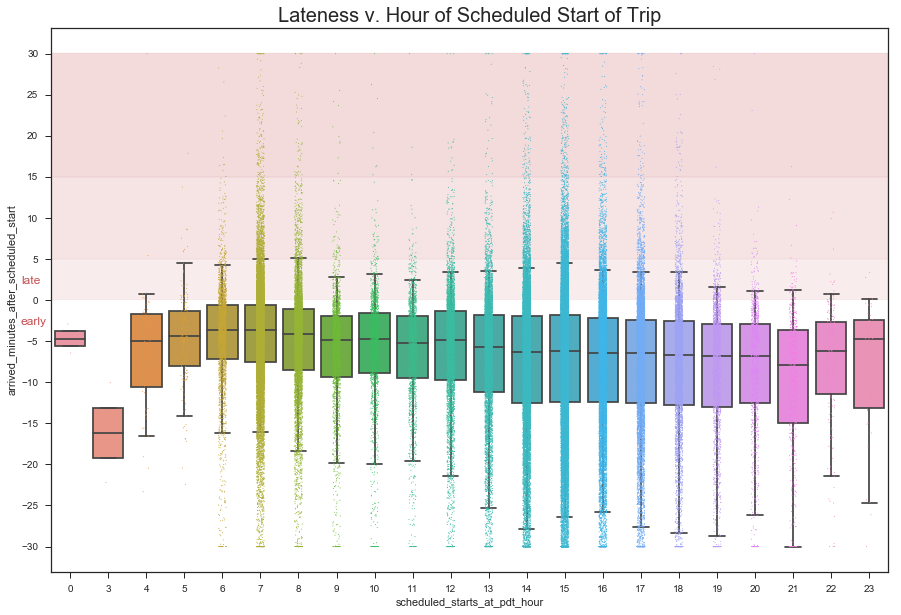

In [13]:
# start_hr vs lateness
plt.figure(figsize=(15,10)) # super-size the figure
df_y['arrived_minutes_after_scheduled_start']=y/60.0 # convert seconds to minutes
sns.stripplot(x=df_X['scheduled_starts_at_pdt_hour'], y=df_y['arrived_minutes_after_scheduled_start'], jitter=True, size=1, alpha=1)
sns.boxplot(x=df_X['scheduled_starts_at_pdt_hour'], y=df_y['arrived_minutes_after_scheduled_start'], whis=[5, 95], showfliers=False)
# draw a reference line at 0.0 to mark arrive at pickup on-time higher is later
##plt.axhline(y=0.0, color='r', linestyle='-', linewidth=0.75) 
plt.text(-1.3,  2,  'late',  color='r', fontsize=12) # annotate above 0.0 as late
plt.text(-1.3, -3, 'early', color='r', fontsize=12)  # annotate below 0.0 as early
##plt.axhline(y=5, color='r', linestyle=':', linewidth=0.5) # 5 minutes late reference line
##plt.axhline(y=15, color='r', linestyle=':', linewidth=0.5) # 15 minutes late reference line
xstart, xend = plt.gca().get_xlim()
plt.fill_between([xstart, xend], [5.0, 5.0],   [0.0, 0.0],   color='r', alpha=0.1)  # 0-5 min late refernece band
plt.fill_between([xstart, xend], [15.0, 15.0], [5.0, 5.0],   color='r', alpha=0.15) # 5-15 min late refernece band
plt.fill_between([xstart, xend], [30.1, 30.1], [15.0, 15.0], color='r', alpha=0.2)  # 15-30 min late refernece band
plt.yticks(np.arange(-30, 30+1, 5.0)) # mark y ticks in 5 minute increments
plt.title('Lateness v. Hour of Scheduled Start of Trip', fontsize=20)

For trips starting 7am-8am the latest 5% of trips (above top whisker) arrive a few minutes later on average than at other times. Morning pickups (at home) probably have more visibility and importance to organizers than afternoon pickups (at school). TODO: see if late pickup complaints are for morning vs afternoon trips.
Business could respond by telling parents (organizers) to move rides 5 minutes earlier to prevent tardyness at school.
Some overall driver incentives/training/nudges, not specific to trip start time, would be helpful.

Text(0.5,1,'Lateness v. Hour of Scheduled End of Trip')

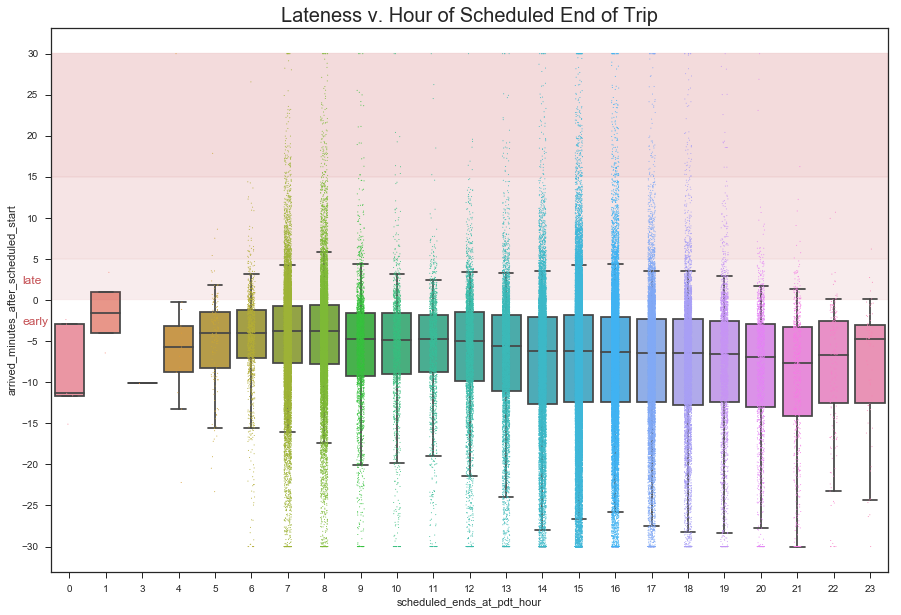

In [14]:
# ends_hr vs lateness
plt.figure(figsize=(15,10)) # super-size the figure
df_y['arrived_minutes_after_scheduled_start']=y/60.0 # convert seconds to minutes
sns.stripplot(x=df_X['scheduled_ends_at_pdt_hour'], y=df_y['arrived_minutes_after_scheduled_start'], jitter=True, size=1, alpha=1)
sns.boxplot(x=df_X['scheduled_ends_at_pdt_hour'], y=df_y['arrived_minutes_after_scheduled_start'], whis=[5, 95], showfliers=False)
plt.text(-1.3,  2,  'late',  color='r', fontsize=12) # annotate above 0.0 as late
plt.text(-1.3, -3, 'early', color='r', fontsize=12)  # annotate below 0.0 as early
xstart, xend = plt.gca().get_xlim()
plt.fill_between([xstart, xend], [5.0, 5.0],   [0.0, 0.0],   color='r', alpha=0.1)  # 0-5 min late refernece band
plt.fill_between([xstart, xend], [15.0, 15.0], [5.0, 5.0],   color='r', alpha=0.15) # 5-15 min late refernece band
plt.fill_between([xstart, xend], [30.1, 30.1], [15.0, 15.0], color='r', alpha=0.2)  # 15-30 min late refernece band
plt.yticks(np.arange(-30, 30+1, 5.0)) # mark y ticks in 5 minute increments
plt.title('Lateness v. Hour of Scheduled End of Trip', fontsize=20)

Text(0,0.5,'arrived_minutes_after_scheduled_start')

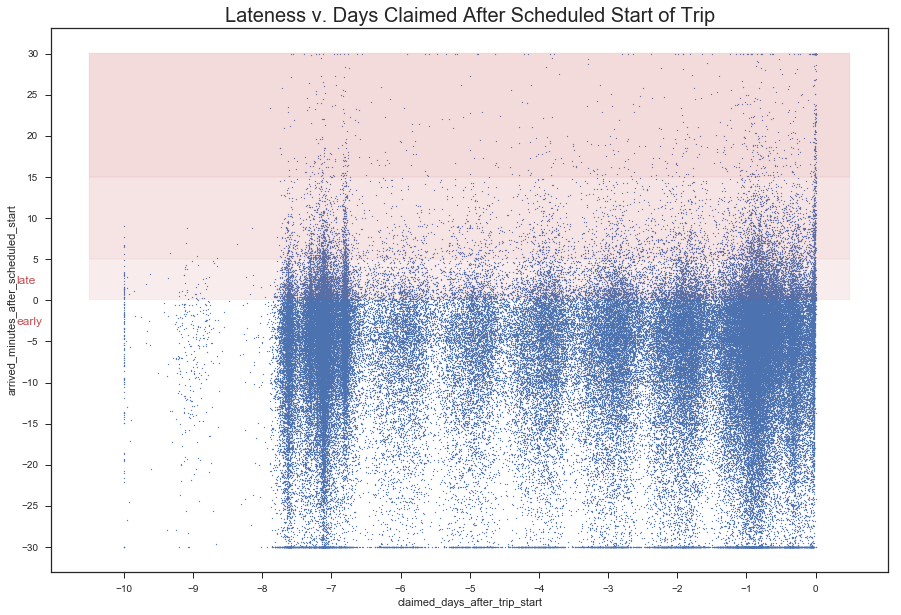

In [15]:
# claimed_before_trip_start_secs vs lateness
# if I upgrade to seaborn 9.0 I can get sns.scatterplot which is a bit nicer interface
plt.figure(figsize=(15,10)) # super-size the figure
df_y['arrived_minutes_after_scheduled_start']=y/60.0 # convert seconds to minutes
df_xadj=pd.DataFrame()
df_xadj['claimed_days_after_trip_start']=(-df_X['claimed_before_trip_start_secs']).clip(-864000,0)/(24*60*60) # convert seconds to days
plt.scatter(x=df_xadj['claimed_days_after_trip_start'], y=df_y['arrived_minutes_after_scheduled_start'], s=1, alpha=1)
## sns.lmplot seems buggy with size=1
##df_xy=pd.DataFrame()
##df_xy['claimed_days_after_trip_start']=df_xadj['claimed_days_after_trip_start']
##df_xy['arrived_minutes_after_scheduled_start']=df_y['arrived_minutes_after_scheduled_start']
##sns.lmplot(x='claimed_days_after_trip_start', y='arrived_minutes_after_scheduled_start', data=df_xy, fit_reg=False, size=1)
##sns.boxplot(x=df_xadj['claimed_days_after_trip_start'].round(0), y=df_y['arrived_minutes_after_scheduled_start'], whis=[5, 95], showfliers=False)
xstart, xend = plt.gca().get_xlim()
plt.text(xstart-(.1*abs(xstart)),  2, 'late',  color='r', fontsize=12) # annotate above 0.0 as late
plt.text(xstart-(.1*abs(xstart)), -3, 'early', color='r', fontsize=12) # annotate below 0.0 as early
plt.fill_between([xstart, xend], [5.0, 5.0],   [0.0, 0.0],   color='r', alpha=0.1)  # 0-5 min late refernece band
plt.fill_between([xstart, xend], [15.0, 15.0], [5.0, 5.0],   color='r', alpha=0.15) # 5-15 min late refernece band
plt.fill_between([xstart, xend], [30.1, 30.1], [15.0, 15.0], color='r', alpha=0.2)  # 15-30 min late refernece band
plt.yticks(np.arange(-30, 30+1, 5.0)) # mark y ticks in 5 minute increments
plt.xticks(range(int(xstart), int(xend)+1, 1))
plt.title('Lateness v. Days Claimed After Scheduled Start of Trip', fontsize=20)
plt.xlabel('claimed_days_after_trip_start')
plt.ylabel('arrived_minutes_after_scheduled_start')

This tells us nothing but shows some interesting patterns in claiming behavior... rides claimed at or after schedule trip start arrive late (no suprise). Also... lots of claiming within a day of the start of ride; possibly due to same day rides (no suprise). Also... lots of claiming action 7 days before; this is when upcoming rides enter the marketplace (no suprise). Also... a daily trend indicative of organizers and drivers sleeping at night (no suprise). Also... truncation on both axes; an artifact of how I chose to show long tails on this plot. 

Text(0,0.5,'arrived_minutes_after_scheduled_start')

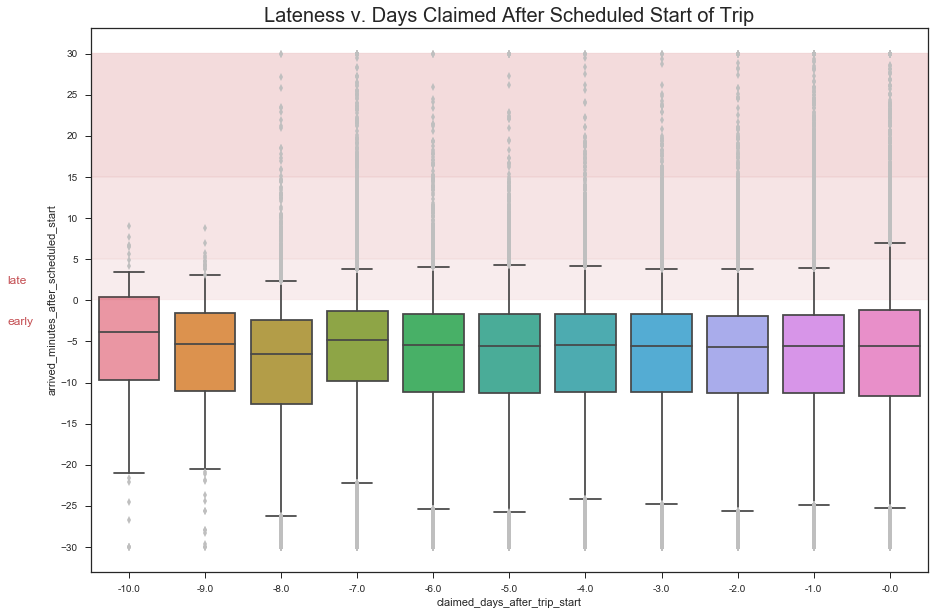

In [16]:
# claimed_before_trip_start_secs vs lateness
# do separate boxplot by day
plt.figure(figsize=(15,10)) # super-size the figure
df_y['arrived_minutes_after_scheduled_start']=y/60.0 # convert seconds to minutes
df_xadj=pd.DataFrame()
df_xadj['claimed_days_after_trip_start']=(-df_X['claimed_before_trip_start_secs']).clip(-864000,0)/(24*60*60) # convert seconds to days
flierprops = dict(markerfacecolor='0.75', markersize=5, linestyle='none')
sns.boxplot(x=df_xadj['claimed_days_after_trip_start'].round(0), y=df_y['arrived_minutes_after_scheduled_start'], 
            whis=[5, 95], showfliers=True, flierprops=flierprops)
xstart, xend = plt.gca().get_xlim()
plt.text(xstart-(.1*(xend-xstart)),  2, 'late',  color='r', fontsize=12) # annotate above 0.0 as late
plt.text(xstart-(.1*(xend-xstart)), -3, 'early', color='r', fontsize=12) # annotate below 0.0 as early
plt.fill_between([xstart, xend], [5.0, 5.0],   [0.0, 0.0],   color='r', alpha=0.1)  # 0-5 min late refernece band
plt.fill_between([xstart, xend], [15.0, 15.0], [5.0, 5.0],   color='r', alpha=0.15) # 5-15 min late refernece band
plt.fill_between([xstart, xend], [30.1, 30.1], [15.0, 15.0], color='r', alpha=0.2)  # 15-30 min late refernece band
plt.yticks(np.arange(-30, 30+1, 5.0)) # mark y ticks in 5 minute increments
plt.xticks(range(int(xstart), int(xend)+1, 1))
plt.title('Lateness v. Days Claimed After Scheduled Start of Trip', fontsize=20)
plt.xlabel('claimed_days_after_trip_start')
plt.ylabel('arrived_minutes_after_scheduled_start')

This tells is there are significant lateness problems, not on average, but in the tail 5% on the day of the ride.

(33950, 2)


Text(0.5,1,'Lateness v. Days Claimed After Scheduled Start of Trip (claimed on day of trip)')

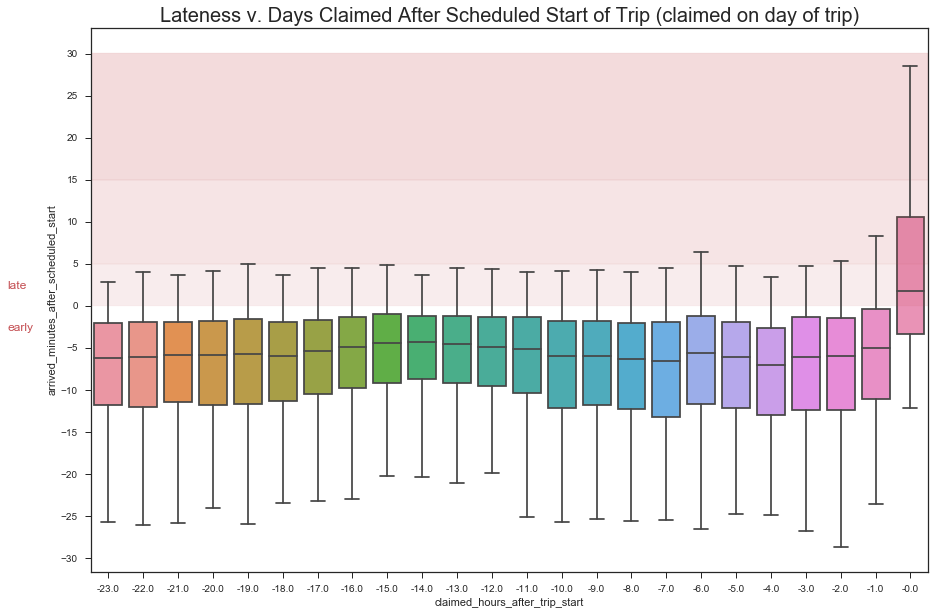

In [17]:
# claimed_before_trip_start_secs vs lateness
# lets zoom in on the day of the ride and do boxplot by hour
plt.figure(figsize=(15,10)) # super-size the figure
df_y['arrived_minutes_after_scheduled_start']=y/60.0 # convert seconds to minutes
df_xadj=pd.DataFrame()
df_xadj['claimed_hours_after_trip_start']=(-df_X['claimed_before_trip_start_secs']).clip(-864000,0)/(60*60) # convert seconds to hours
df_xy=pd.DataFrame()
df_xy['claimed_hours_after_trip_start']=df_xadj['claimed_hours_after_trip_start'].round(0)
df_xy['arrived_minutes_after_scheduled_start']=df_y['arrived_minutes_after_scheduled_start']
df_xy_day_of_trip=df_xy[df_xy.claimed_hours_after_trip_start > -24.0]
print(df_xy_day_of_trip.shape)
sns.boxplot(x='claimed_hours_after_trip_start', y='arrived_minutes_after_scheduled_start', data=df_xy_day_of_trip, whis=[5, 95], showfliers=False)
xstart, xend = plt.gca().get_xlim()
plt.text(xstart-(.1*(xend-xstart)),  2, 'late',  color='r', fontsize=12) # annotate above 0.0 as late
plt.text(xstart-(.1*(xend-xstart)), -3, 'early', color='r', fontsize=12) # annotate below 0.0 as early
plt.fill_between([xstart, xend], [5.0, 5.0],   [0.0, 0.0],   color='r', alpha=0.1)  # 0-5 min late refernece band
plt.fill_between([xstart, xend], [15.0, 15.0], [5.0, 5.0],   color='r', alpha=0.15) # 5-15 min late refernece band
plt.fill_between([xstart, xend], [30.1, 30.1], [15.0, 15.0], color='r', alpha=0.2)  # 15-30 min late refernece band
plt.yticks(np.arange(-30, 30+1, 5.0)) # mark y ticks in 5 minute increments
plt.xticks(range(int(xstart), int(xend)+1, 1))
plt.title('Lateness v. Days Claimed After Scheduled Start of Trip (claimed on day of trip)', fontsize=20)

This tells us the problems are in the last 1 or 2 hours before the trip starts.

(80642, 2)


Text(0.5,1,'Lateness v. Days Claimed After Scheduled Start of Trip (claimed within 2 hrs of trip start)')

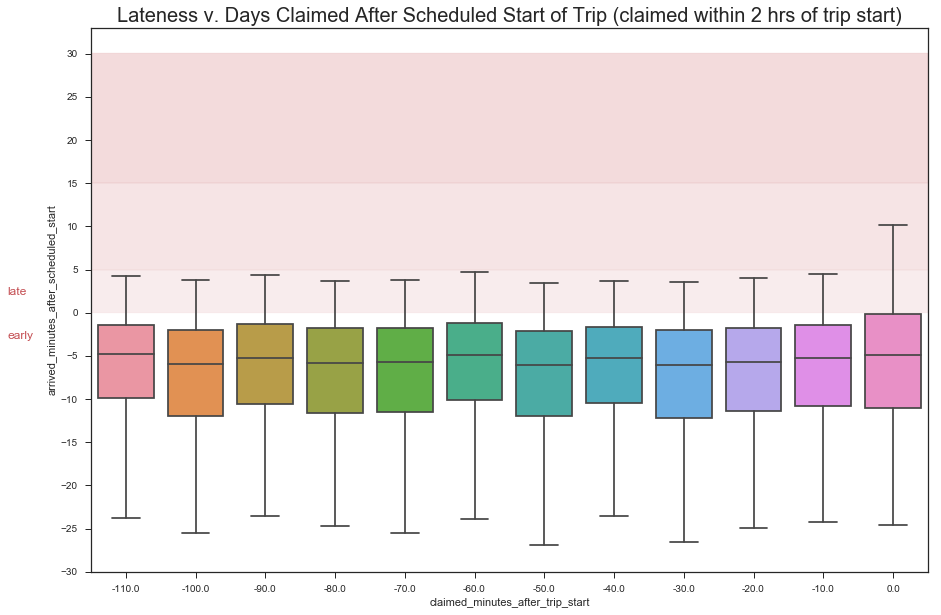

In [18]:
# claimed_before_trip_start_secs vs lateness
# lets zoom in on the day of the ride and do boxplot by 10 min for last 2 hours
plt.figure(figsize=(15,10)) # super-size the figure
df_y['arrived_minutes_after_scheduled_start']=y/60.0 # convert seconds to minutes
df_xadj=pd.DataFrame()
df_xadj['claimed_minutes_after_trip_start']=(-df_X['claimed_before_trip_start_secs']).clip(-864000,0)/(60*60) # convert seconds to minutes
df_xy=pd.DataFrame()
df_xy['claimed_minutes_after_trip_start']=df_xadj['claimed_minutes_after_trip_start'].round(-1)
df_xy['arrived_minutes_after_scheduled_start']=df_y['arrived_minutes_after_scheduled_start']
df_xy_day_of_trip=df_xy[df_xy.claimed_minutes_after_trip_start > -120.0]
print(df_xy_day_of_trip.shape)
sns.boxplot(x='claimed_minutes_after_trip_start', y='arrived_minutes_after_scheduled_start', data=df_xy_day_of_trip, whis=[5, 95], showfliers=False)
xstart, xend = plt.gca().get_xlim()
plt.text(xstart-(.1*(xend-xstart)),  2, 'late',  color='r', fontsize=12) # annotate above 0.0 as late
plt.text(xstart-(.1*(xend-xstart)), -3, 'early', color='r', fontsize=12) # annotate below 0.0 as early
plt.fill_between([xstart, xend], [5.0, 5.0],   [0.0, 0.0],   color='r', alpha=0.1)  # 0-5 min late refernece band
plt.fill_between([xstart, xend], [15.0, 15.0], [5.0, 5.0],   color='r', alpha=0.15) # 5-15 min late refernece band
plt.fill_between([xstart, xend], [30.1, 30.1], [15.0, 15.0], color='r', alpha=0.2)  # 15-30 min late refernece band
plt.yticks(np.arange(-30, 30+1, 5.0)) # mark y ticks in 5 minute increments
plt.xticks(range(int(xstart), int(xend)+1, 1))
plt.title('Lateness v. Days Claimed After Scheduled Start of Trip (claimed within 2 hrs of trip start)', fontsize=20)

This tells us the driver is still on time as much as usual if the ride was claimed before 10 minutes. Its only in the last 10 minutes that there is a significant lateness issue! Too good to be true! This is survivor bias. Rides get canceled if the driver is going to be very late. That case does not show up in this data! So we have to worry about last minute user cancels which is a somewhat different issue than lateness.

In [67]:
# column names ending in _id
df_X.filter(regex='_id$').columns

Index(['origin_region_id', 'lead_organizer_id', 'creator_id', 'driver_id',
       'destination_region_id', 'trip_template_id', 'destination_location_id',
       'origin_location_id'],
      dtype='object')

In [68]:
# DROP column names ending in _id
df_X.drop(df_X.filter(regex='_id$').columns, axis = 1, inplace = True)
df_X.shape

(125675, 209)

In [69]:
# break df_X,y into test and train sets
##from sklearn.model_selection import train_test_split
##X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.20, random_state=808)

## to test for leakage train on older data and test on newer data
## approximate 80/20 split
## data contains 1 year of data, first 298 days of the year use for training, rest use for testing
y_train = y[df_X.scheduled_starts_at_pdt_dayofyear<299]
X_train = df_X[df_X.scheduled_starts_at_pdt_dayofyear<299]
y_test = y[df_X.scheduled_starts_at_pdt_dayofyear>=299]
X_test = df_X[df_X.scheduled_starts_at_pdt_dayofyear>=299]


In [70]:
for i in X_train, X_test, y_train, y_test:
    print(i.shape)

(100198, 209)
(25477, 209)
(100198,)
(25477,)


In [71]:
# select a regressor
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(max_depth=4, random_state=808, n_estimators=200)

In [72]:
# fit model
model=model.fit(X_train,y_train)

In [73]:
print(model.feature_importances_)

[1.80404777e-02 0.00000000e+00 4.09800849e-04 0.00000000e+00
 0.00000000e+00 2.72959150e-06 4.19961399e-03 4.87426082e-04
 0.00000000e+00 5.49040739e-04 4.93137167e-05 0.00000000e+00
 5.51811882e-04 0.00000000e+00 2.51116964e-04 5.46233180e-03
 8.51442283e-04 9.31016756e-03 0.00000000e+00 4.16683413e-02
 0.00000000e+00 4.30805642e-02 8.92141974e-04 1.61998976e-02
 4.27042671e-04 1.91405117e-02 7.41902796e-03 0.00000000e+00
 9.19916482e-03 2.29756800e-03 3.13933922e-03 0.00000000e+00
 7.80766387e-05 0.00000000e+00 5.42707958e-04 0.00000000e+00
 3.92757287e-04 8.20479608e-05 8.44793387e-03 0.00000000e+00
 0.00000000e+00 1.52081995e-04 5.26006224e-02 0.00000000e+00
 9.25961707e-04 3.28972691e-04 6.30453764e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.38834763e-04 1.88827221e-02
 9.17099745e-04 2.00370233e-04 0.00000000e+00 2.14507587e-06
 0.00000000e+00 1.13621410e-04 0.00000000e+00 1.25860562e-03
 4.46376372e-02 5.14987902e-04 8.43430599e-06 4.28040408e-04
 1.32488861e-03 2.312546

In [74]:
importances = list(zip(model.feature_importances_, X_train.columns))
importances.sort(reverse=True)
importances

[(0.15772635478986835, 'avg_prior_arrived_late_seconds'),
 (0.052600622375116944, 'claimed_before_trip_start_secs'),
 (0.04463763716746889, 'driver_previous_completed_trips'),
 (0.04308056424723175, 'avg_prior_arrived_late_seconds_to_origin_location'),
 (0.04166834134438286, 'driver_home_lat'),
 (0.0365088567096899, 'driver_home_lon'),
 (0.027528939786409672, 'origin_lon'),
 (0.02650061571840987, 'scheduled_starts_at_pdt_hour'),
 (0.025523417786739964, 'driver_signup_before_trip_start_secs'),
 (0.02515070498786813, 'driver_created_at_pdt_dayofyear'),
 (0.022043707975572934, 'driver_signup_before_org_signup_secs'),
 (0.020373866004753233, 'driver_created_at_pdt_day'),
 (0.019140511714229595, 'origin_lat'),
 (0.018882722143711214, 'trip_created_before_trip_start_secs'),
 (0.018040477732991222, 'Unnamed: 0'),
 (0.018020335698941056, 'driver_signup_before_trip_created_secs'),
 (0.0161998976092448, 'driver_signup_before_trip_claimed_secs'),
 (0.015425720539844888, 'lead_organizer_previous_c

In [75]:
# top 10 importances
dict(importances[:10]).values()


dict_values(['avg_prior_arrived_late_seconds', 'claimed_before_trip_start_secs', 'driver_previous_completed_trips', 'avg_prior_arrived_late_seconds_to_origin_location', 'driver_home_lat', 'driver_home_lon', 'origin_lon', 'scheduled_starts_at_pdt_hour', 'driver_signup_before_trip_start_secs', 'driver_created_at_pdt_dayofyear'])

In [76]:
# number of non-zero features used
len([(i,f) for i, f in importances if i > 0])

155

In [77]:
# number of features with importance above 1%
len([(i,f) for i, f in importances if i > 0.01])

30

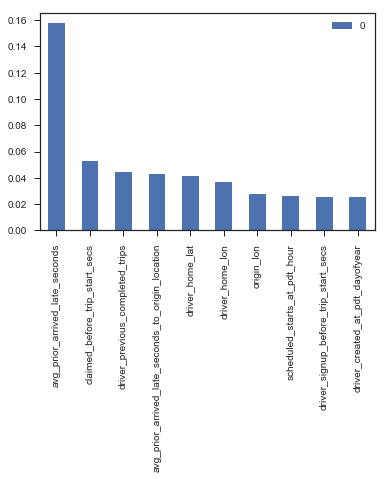

In [78]:
pd.DataFrame(importances[:10], index=[x for (_,x) in importances[:10] ]).plot(kind = 'bar')

In [79]:
# score against TRAINING set
model.score(X_train,y_train)

0.2949845494326796

In [80]:
# score against TEST set
model.score(X_test,y_test)

0.2169964041844824

In [81]:
model_y_test_pred = model.predict(X_test)
model_y_test_pred.size

25477

In [82]:
type(model_y_test_pred)

numpy.ndarray

In [83]:
model_y_test_pred[:10]

array([-279.79543532, -242.11417048,    5.7409928 , -239.20644505,
        -32.84724105,  -60.19041884, -382.33659072, -577.12660966,
       -222.05293284, -507.45586432])

In [84]:
pd.Series(model_y_test_pred).std()

230.6569217713909

In [85]:
pd.Series(model_y_test_pred).corr(y_test)

-0.016345845307375446

In [86]:
# regression metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from math import sqrt
print ("%.3f %.2f %.0f %.3f %.0f %.0f %.2f" % 
       (explained_variance_score(y_test, model_y_test_pred),
        sqrt(mean_squared_error(y_test, model_y_test_pred))/60, # sqrt of MSE in minutes
        mean_squared_error(y_test, model_y_test_pred), 
        r2_score(y_test, model_y_test_pred), 
        mean_absolute_error(y_test, model_y_test_pred), 
        median_absolute_error(y_test, model_y_test_pred),
        median_absolute_error(y_test, model_y_test_pred)/60 # MAE in minutes
       ))

0.217 7.39 196804 0.217 327 238 3.97


In [87]:
# make classifications from seconds late target
bins = np.array([0.0, 5*60, 15*60]) # 0 on-time, 1 almost on-time, 2 late, 3 extremely late
bins

array([  0., 300., 900.])

In [88]:
np.digitize(y_test, bins)[:10]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [89]:
# materialize y_test_class array
# check to see how many trips are categorized as 0 on-time, 1 almost on-time, 2 late, 3 extremely late
y_test_class=np.digitize(y_test, bins)
unique, counts = np.unique(y_test_class, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 21301]
 [    1  3118]
 [    2   904]
 [    3   154]]


In [90]:
# materialize model_y_pred_class
# check to see how many trips are categorized as 0 on-time, 1 almost on-time, 2 late, 3 extremely late
model_y_test_pred_class=np.digitize(model_y_test_pred, bins)
print(np.asarray(np.unique(model_y_test_pred_class, return_counts=True)).T)

[[    0 25151]
 [    1   259]
 [    2    60]
 [    3     7]]


In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class,model_y_test_pred_class))

             precision    recall  f1-score   support

          0       0.84      0.99      0.91     21301
          1       0.34      0.03      0.05      3118
          2       0.28      0.02      0.04       904
          3       0.43      0.02      0.04       154

avg / total       0.76      0.83      0.77     25477



In [92]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_class,model_y_test_pred_class,labels=[0,1,2,3]))

[[21160   129    12     0]
 [ 3013    88    16     1]
 [  848    36    17     3]
 [  130     6    15     3]]


In [93]:
type(model_y_test_pred)

numpy.ndarray

In [94]:
type(y_test)

pandas.core.series.Series

In [95]:
model_y_test_residual=y_test-model_y_test_pred
type(model_y_test_residual)

pandas.core.series.Series

In [96]:
model_y_test_residual.head(20)

11      578.795435
14       -7.885830
29       -6.740993
43      144.206445
83      110.847241
108      -2.809581
138    -259.663409
145      31.126610
161     -63.947067
162     139.455864
164     476.448675
167    -125.522008
169    -381.892534
170     139.411174
171    -141.744904
173    -285.183073
181   -1181.717564
211     449.491013
218     270.485688
227     124.029142
Name: 1, dtype: float64

In [97]:
model_y_test_residual.mean()

8.929284511914735

In [98]:
model_y_test_residual.std()

443.5451908416173

Text(0.5,1,'Residual Lateness v. Hour of Scheduled Start of Trip')

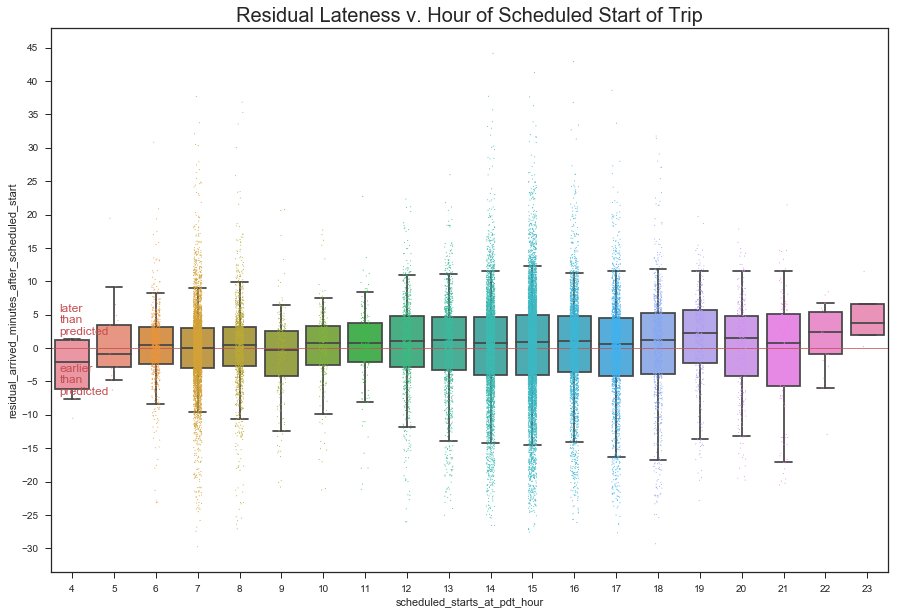

In [99]:
# redo above plot using residual instead of lateness itself (on test set instead of training+testset)
# start_hr vs residual lateness
plt.figure(figsize=(15,10)) # super-size the figure
df_y_test=pd.DataFrame()
df_y_test['residual_arrived_minutes_after_scheduled_start']=model_y_test_residual/60.0 # convert seconds to minutes
sns.stripplot(x=X_test['scheduled_starts_at_pdt_hour'], y=df_y_test['residual_arrived_minutes_after_scheduled_start'], jitter=True, size=1, alpha=1)
sns.boxplot(x=X_test['scheduled_starts_at_pdt_hour'], y=df_y_test['residual_arrived_minutes_after_scheduled_start'], whis=[5, 95], showfliers=False)
plt.text(-0.3,  2,  'later\nthan\npredicted',  color='r', fontsize=12) # annotate above 0.0 as late
plt.text(-0.3, -7, 'earlier\nthan\npredicted', color='r', fontsize=12)  # annotate below 0.0 as early
xstart, xend = plt.gca().get_xlim()
# draw a reference line at 0.0 to mark arrive at pickup on-time higher is later
plt.axhline(y=0.0, color='r', linestyle='-', linewidth=0.75) 
ystart, yend = plt.gca().get_ylim()
plt.yticks(np.arange(int(ystart/5)*5, yend+1, 5.0)) # mark y ticks in 5 minute increments
plt.title('Residual Lateness v. Hour of Scheduled Start of Trip', fontsize=20)

This show prediction variance is large. Prediction is poor. Bias is ok.


In [100]:
df_y_test['residual_arrived_minutes_after_scheduled_start'].mean()

0.1488214085319122

In [101]:
df_y_test['residual_arrived_minutes_after_scheduled_start'].std()

7.392419847360298

(16141, 2)


Text(0.5,1,'Residual Lateness v. Days Claimed After Scheduled Start of Trip (claimed within 2 hrs of trip start)')

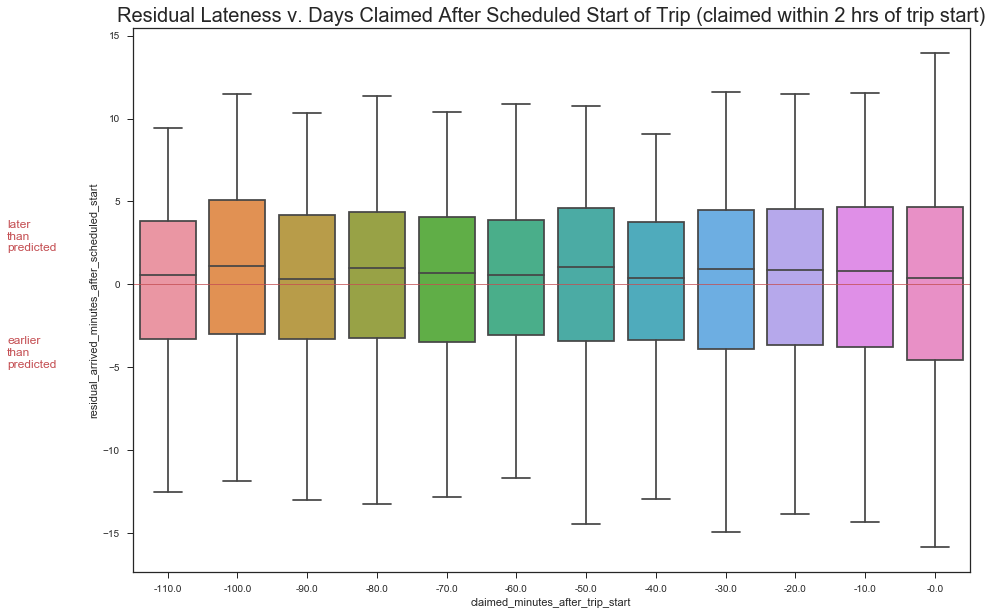

In [102]:
# redo above plot using residual instead of lateness itself (on test set instead of training+testset)
# claimed_before_trip_start_secs vs residual lateness
# lets zoom in on the day of the ride and do boxplot by 10 min for last 2 hours
plt.figure(figsize=(15,10)) # super-size the figure
##df_y_test=pd.DataFrame()
##df_y_test['residual_arrived_minutes_after_scheduled_start']=model_y_test_residual/60.0 # convert seconds to minutes
df_test_xadj=pd.DataFrame()
df_test_xadj['claimed_minutes_after_trip_start']=(-X_test['claimed_before_trip_start_secs']).clip(-864000,0)/(60*60) # convert seconds to minutes
df_test_xy=pd.DataFrame()
df_test_xy['claimed_minutes_after_trip_start']=df_test_xadj['claimed_minutes_after_trip_start'].round(-1)
df_test_xy['residual_arrived_minutes_after_scheduled_start']=df_y_test['residual_arrived_minutes_after_scheduled_start']
df_test_xy_day_of_trip=df_test_xy[df_test_xy.claimed_minutes_after_trip_start > -120.0]
print(df_test_xy_day_of_trip.shape)
sns.boxplot(x='claimed_minutes_after_trip_start', y='residual_arrived_minutes_after_scheduled_start', data=df_test_xy_day_of_trip, whis=[5, 95], showfliers=False)
xstart, xend = plt.gca().get_xlim()
plt.text(xstart-(.15*(xend-xstart)),  2, 'later\nthan\npredicted',  color='r', fontsize=12) # annotate above 0.0 as late
plt.text(xstart-(.15*(xend-xstart)), -5, 'earlier\nthan\npredicted', color='r', fontsize=12) # annotate below 0.0 as early
# draw a reference line at 0.0 to mark arrive at pickup on-time higher is later
plt.axhline(y=0.0, color='r', linestyle='-', linewidth=0.75) 
ystart, yend = plt.gca().get_ylim()
plt.yticks(np.arange(int(ystart/5)*5, yend+1, 5.0)) # mark y ticks in 5 minute increments
plt.xticks(range(int(xstart), int(xend)+1, 1))
plt.title('Residual Lateness v. Days Claimed After Scheduled Start of Trip (claimed within 2 hrs of trip start)', fontsize=20)

This tells us median trip is about 1 min later arriving than predicted; observe the longer wiskers (5 percentile to  to 95 percentile). Variance gets worse within 10 minutes of scheduled start. And even worse than shown because of last-minute cancels which are not shown.

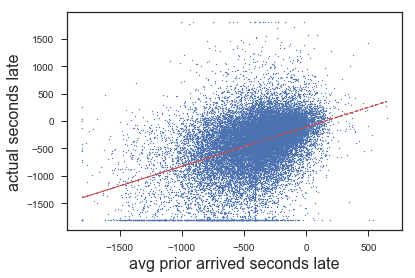

In [104]:
# plot scatter plot of avg_prior_arrived_late_seconds vs actual seconds late on test set
plt.scatter(X_test['avg_prior_arrived_late_seconds'], y_test, s=1)
plt.xlabel('avg prior arrived seconds late', fontsize=16)
plt.ylabel('actual seconds late', fontsize=16)
# trend line
z = np.polyfit(X_test['avg_prior_arrived_late_seconds'], y_test, 1)
p = np.poly1d(z)
plt.plot(X_test['avg_prior_arrived_late_seconds'], p(X_test['avg_prior_arrived_late_seconds']), "r--", lw=1)


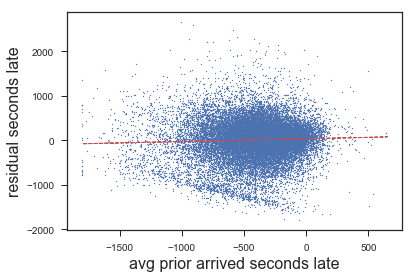

In [105]:
# plot scatter plot of avg_prior_arrived_late_seconds vs residual seconds late on test set
plt.scatter(X_test['avg_prior_arrived_late_seconds'], model_y_test_residual, s=1)
plt.xlabel('avg prior arrived seconds late', fontsize=16)
plt.ylabel('residual seconds late', fontsize=16)
# trend line
z = np.polyfit(X_test['avg_prior_arrived_late_seconds'], model_y_test_residual, 1)
p = np.poly1d(z)
plt.plot(X_test['avg_prior_arrived_late_seconds'], p(X_test['avg_prior_arrived_late_seconds']), "r--", lw=1)


y=-0.438148x+(-307.886904)


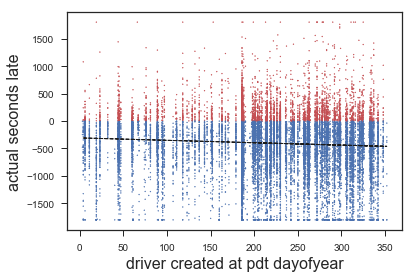

In [106]:
# plot scatter plot of driver_created_at_pdt_dayofyear vs actual seconds late on test set
colors = np.where(y_test > 0, 'r', 'b') # color late arrival red
plt.scatter(X_test['driver_created_at_pdt_dayofyear'], y_test, s=1, c=colors)
plt.xlabel('driver created at pdt dayofyear', fontsize=16)
plt.ylabel('actual seconds late', fontsize=16)
# trend line in black
z = np.polyfit(X_test['driver_created_at_pdt_dayofyear'], y_test, 1)
p = np.poly1d(z)
plt.plot(X_test['driver_created_at_pdt_dayofyear'], p(X_test['driver_created_at_pdt_dayofyear']), "k--", lw=1)
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))
## arrival gets *slightly* later for drivers onboarded later in the year (0.023*dayofyear) which is < 1 second per month
## does not really tell me that late drivers cluster together based on on-boarding time


y=0.076728x+(-429.737274)


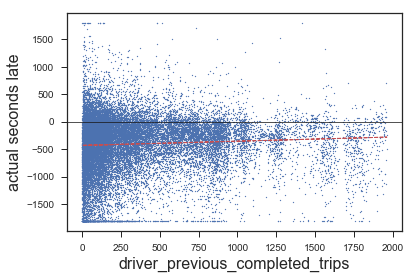

In [109]:
# plot scatter plot of 'driver_previous_completed_trips' vs actual seconds late on test set
plt.scatter(X_test['driver_previous_completed_trips'], y_test, s=1)
plt.xlabel('driver_previous_completed_trips', fontsize=16)
plt.ylabel('actual seconds late', fontsize=16)
# zero line in black
plt.axhline(y=0.0, color='k', linestyle='-', linewidth=0.75) 
# trend line dashed in red
z = np.polyfit(X_test['driver_previous_completed_trips'], y_test, 1)
p = np.poly1d(z)
plt.plot(X_test['driver_previous_completed_trips'], p(X_test['driver_previous_completed_trips']), "r--", lw=1)
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))


the more experience the driver has the later they will be! by a very small amount 7s after each 100 trips! This linear trend line does not capture much of the variation.

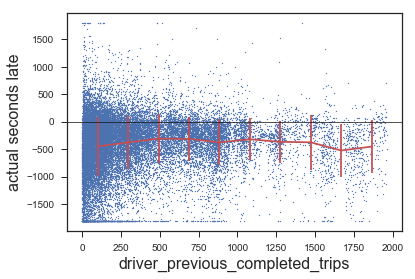

In [110]:
# plot scatter plot of 'driver_previous_completed_trips' vs actual seconds late on test set
plt.scatter(X_test['driver_previous_completed_trips'], y_test, s=1)
plt.xlabel('driver_previous_completed_trips', fontsize=16)
plt.ylabel('actual seconds late', fontsize=16)
# zero line in black
plt.axhline(y=0.0, color='k', linestyle='-', linewidth=0.75) 

# Show mean and std for 10 bins
# Jaime's answer from https://stackoverflow.com/questions/15556930/turn-scatter-data-into-binned-data-with-errors-bars-equal-to-standard-deviation
x=X_test['driver_previous_completed_trips']
y=y_test
nbins = 10

n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

###plt.plot(x, y, 'bo')
plt.errorbar((_[1:] + _[:-1])/2, mean, yerr=std, fmt='r-')
plt.show()

shows a little more variation not captured by the linear trend line. Noobies have more variation in lateness.